Have obtained the tf/idf matrix, we can now train the model

In [144]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearnex import patch_sklearn 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)
#improve performance of SCM
patch_sklearn()

##################################################
# Hyperparameters:
_C = 1
_kernal = "rbf"
##################################################

2023-01-10 21:02:32,741 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-10 21:02:32,763 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [145]:
def time_taken(t):
    training_time = time.time() - t
    logging.info(f"train time: {training_time}" )

In [146]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

2023-01-10 21:02:32,882 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-10 21:02:32,893 | INFO : sklearn.model_selection.train_test_split: running accelerated version on CPU


In [147]:
t = time.time()

classifier = SVC(kernel=_kernal, C = _C)
classifier.fit(X_train, y_train)
time_taken(t)
#save_pickle_object(classifier, gl.pkl_classifier_SVM)


2023-01-10 21:02:32,947 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
2023-01-10 21:02:37,813 | INFO : train time: 4.869976997375488


2023-01-10 21:02:37,844 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU


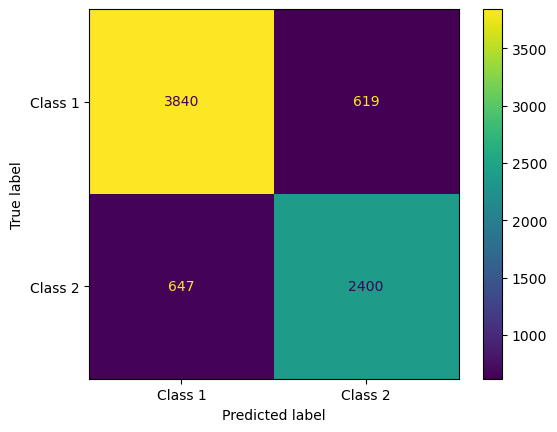

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.79      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [148]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

In [149]:
t = time.time()
classifier = SVC(kernel=_kernal, C = _C, class_weight="balanced")
classifier.fit(X_train, y_train)
time_taken(t)
#save_pickle_object(classifier, gl.pkl_classifier_balanced_SVM)

2023-01-10 21:02:38,657 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
2023-01-10 21:02:44,568 | INFO : train time: 5.911099433898926


2023-01-10 21:02:44,601 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU


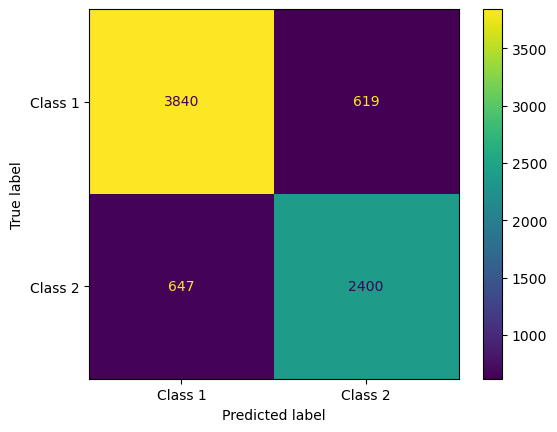

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.79      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [150]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The results are very similar to the baseline solution. There is no overall improvement in using class-weight = "balanced".

Now try bigrams, trigrams, stemming and lemmatization

2023-01-10 21:02:45,363 | INFO : Calculating for Bigram...
2023-01-10 21:02:45,364 | INFO : Loading pickle file from: pickle\pkl_X_bigram_tfidf.pkl
2023-01-10 21:02:45,391 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-10 21:02:45,395 | INFO : sklearn.model_selection.train_test_split: running accelerated version on CPU
2023-01-10 21:02:45,399 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
2023-01-10 21:02:57,639 | INFO : train time: 12.240021467208862
2023-01-10 21:02:57,640 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU
2023-01-10 21:03:00,380 | INFO : Results for Bigram.


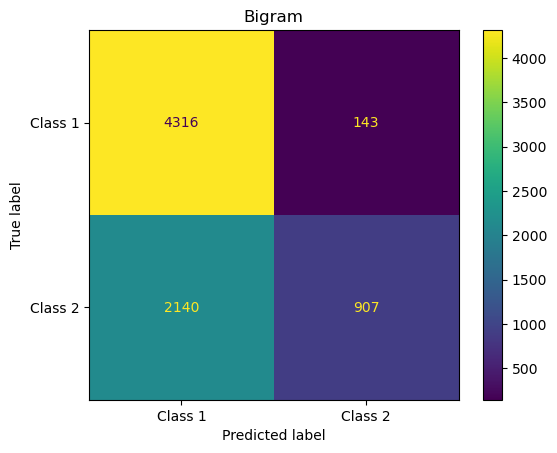

              precision    recall  f1-score   support

     Class 1       0.67      0.97      0.79      4459
     Class 2       0.86      0.30      0.44      3047

    accuracy                           0.70      7506
   macro avg       0.77      0.63      0.62      7506
weighted avg       0.75      0.70      0.65      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.38.
2023-01-10 21:03:00,550 | INFO : Calculating for Trigram...
2023-01-10 21:03:00,550 | INFO : Loading pickle file from: pickle\pkl_X_trigram_tfidf.pkl
2023-01-10 21:03:00,573 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-10 21:03:00,581 | INFO : sklearn.model_selection.train_test_split: running accelerated versi

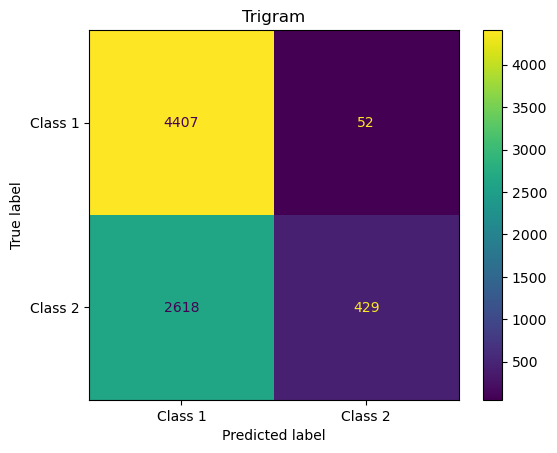

              precision    recall  f1-score   support

     Class 1       0.63      0.99      0.77      4459
     Class 2       0.89      0.14      0.24      3047

    accuracy                           0.64      7506
   macro avg       0.76      0.56      0.51      7506
weighted avg       0.73      0.64      0.55      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.26.
2023-01-10 21:03:15,985 | INFO : Calculating for Stemming...
2023-01-10 21:03:15,986 | INFO : Loading pickle file from: pickle\pkl_X_stem_tfidf.pkl
2023-01-10 21:03:16,010 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-10 21:03:16,016 | INFO : sklearn.model_selection.train_test_split: running accelerated version

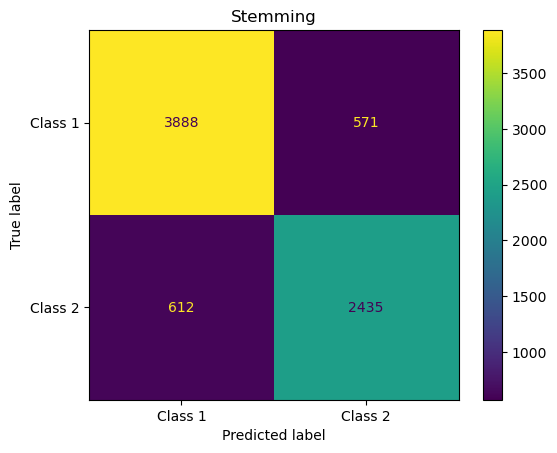

              precision    recall  f1-score   support

     Class 1       0.86      0.87      0.87      4459
     Class 2       0.81      0.80      0.80      3047

    accuracy                           0.84      7506
   macro avg       0.84      0.84      0.84      7506
weighted avg       0.84      0.84      0.84      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.67.
2023-01-10 21:03:20,689 | INFO : Calculating for Lemmatization...
2023-01-10 21:03:20,690 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
2023-01-10 21:03:20,710 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-10 21:03:20,714 | INFO : sklearn.model_selection.train_test_split: running accelerated ver

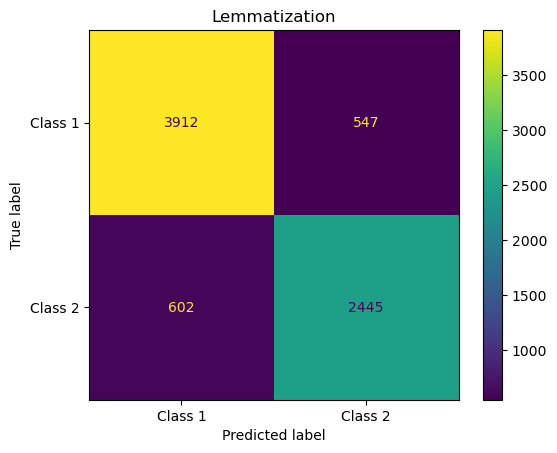

              precision    recall  f1-score   support

     Class 1       0.87      0.88      0.87      4459
     Class 2       0.82      0.80      0.81      3047

    accuracy                           0.85      7506
   macro avg       0.84      0.84      0.84      7506
weighted avg       0.85      0.85      0.85      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.68.


In [151]:
pickle_input = [(gl.pkl_X_bigram_tfidf, "Bigram"), (gl.pkl_X_trigram_tfidf, "Trigram"), (gl.pkl_X_stem_tfidf, "Stemming"), (gl.pkl_X_lem_tfidf, "Lemmatization")]
for pkl, title in pickle_input:
    logging.info(f"Calculating for {title}...")
    X_tfidf = load_pickle_object(pkl)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)
    t = time.time()
    classifier = SVC(kernel=_kernal, C = _C, random_state=42)
    classifier.fit(X_train, y_train)
    time_taken(t)
    y_pred = classifier.predict(X_test)
    logging.info(f"Results for {title}.")
    display_metrics(y_test, y_pred, title)

The results are remarkably similar to the baseline logistic regression model. The bigram results were poor, the trigram results even worse.<br/>
Both stemming and lemmatization gives a small improvement.

Use Gridsearch to find the best value for the hyperparameter C

In [157]:
# Get the data with the best results, the trigram
X_tfidf = load_pickle_object(gl.pkl_X_lem_tfidf)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

2023-01-10 21:43:58,926 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
2023-01-10 21:43:58,950 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-10 21:43:58,956 | INFO : sklearn.model_selection.train_test_split: running accelerated version on CPU


In [158]:
t = time.time()
_scoring = "f1"
params = {"C": [0.1, 0.5, 1, 10, 100], "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(SVC(kernel=_kernal, random_state=42), params, scoring=_scoring, refit=True, verbose=4)
grid_search.fit(X_train, y_train)
time_taken(t)
grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
2023-01-10 21:44:11,336 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
2023-01-10 21:44:12,682 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.850 total time=   1.5s
2023-01-10 21:44:12,893 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
2023-01-10 21:44:14,148 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.845 total time=   1.4s
2023-01-10 21:44:14,345 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
2023-01-10 21:44:15,618 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.843 total time=   1.4s
2023-01-10 21:44:15,826 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
2023-01-10 21:44:17,302 | INFO : sklearn.svm.SVC.predict: ru

SVC(C=1, random_state=42)

In [159]:
grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

The best value for C is 1, and the best kernal is rbf.